# Netflix Data

In [22]:
!pip install langchain_community
!pip install replicate
!pip install wordcloud

In [23]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import os
from google.colab import userdata

# Setup API
api_token = userdata.get("api_token")
os.environ["REPLICATE_API_TOKEN"] = api_token

# Import LLM
from langchain_community.llms import Replicate

# Setup parameter LLM
parameters = {
  "top_k": 5,
  "top_p": 1.0,
  "max_tokens": 4096,
  "min_tokens": 0,
  "random_seed": None,
  "repetition_penalty": 1.0,
  "temperature": 0.7,
  "stopping_criteria": "length (256 tokens)",
  "stopping_sequence": None
}

llm = Replicate(
    model="ibm-granite/granite-3.3-8b-instruct",
    input=parameters,
)
# Load Dataset

df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Movie vs TV Show

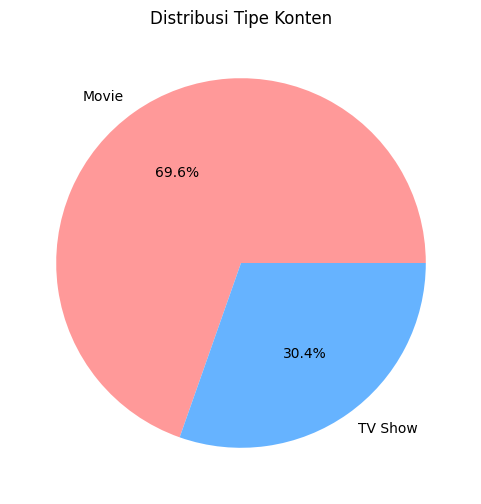

In [25]:
# Distribusi Movie vs TV Show
plt.figure(figsize=(6,6))
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribusi Tipe Konten')
plt.ylabel('')
plt.show()


## Number of releases per year

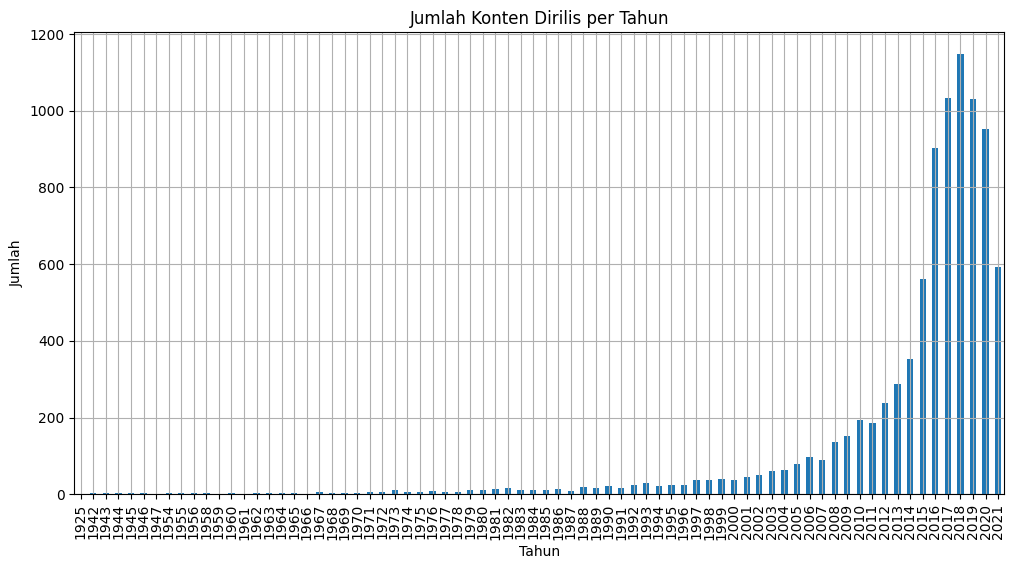

In [28]:
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='bar')
plt.title("Jumlah Konten Dirilis per Tahun")
plt.xlabel("Tahun")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

## Most countries

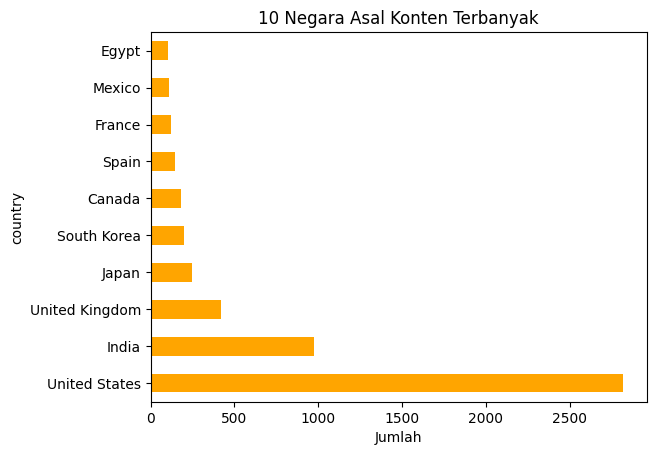

In [29]:
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh', color='orange')
plt.title("10 Negara Asal Konten Terbanyak")
plt.xlabel("Jumlah")
plt.show()

## Rating terbanyak

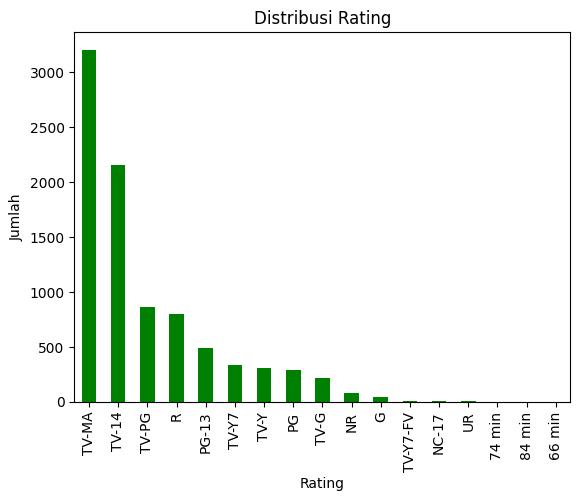

In [31]:
df['rating'].value_counts().plot(kind='bar', color='green')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Jumlah")
plt.show()

## Genre WordCloud

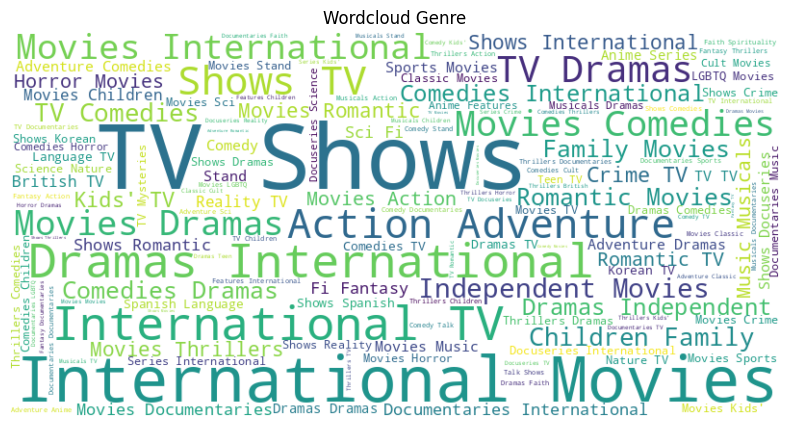

In [32]:
# WordCloud genre
all_genres = ','.join(df['listed_in'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_genres)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Genre')
plt.show()

## Insight & Recommendation

In [36]:
# Prompt
prompt = """
Saya menganalisis data Netflix dan mendapatkan hasil berikut:

- Konten terbanyak dirilis pada tahun 2017.
- Genre populer: International Movies, TV Shows, Dramas, Comedies, Action & Adventure.
- Negara penghasil konten terbanyak: United States, India, United Kingdom, Japan, Korea.
- Tipe konten: Movie lebih banyak ketimbang TV Show.
- Rating populer: TV-MA, TV-14.

Tolong bantu saya:
1. Buat ringkasan insight dalam 3 kalimat.
2. Buat rekomendasi strategi konten untuk Netflix.
3. Jelaskan bagaimana AI digunakan dalam membantu analisis ini.
"""

# Jalankan AI model
response = llm.invoke(prompt)

# Hasil
print(response)

1. **Ringkasan Insights:** Netflix mengalami puncak produksi konten pada tahun 2017, dengan genre populer meliputi film asli dari berbagai negara seperti International Movies, TV Shows, Dramas, Comedies, dan Action & Adventure. Produksi konten utama berasal dari Amerika Serikat, India, United Kingdom, Japan, dan Korea. Jenis konten lebih biasaraya film, dengan rating TV-MA dan TV-14 paling digemari.

2. **Rekomendasi Strategi Konten:**
   - **Investigasi Genre & Asal Negara:** Karena popularitas genre internasional dan konten asli, Netflix bisa meningkatkan investasi terhadap film dan TV shows dari negara-negara yang sudah berhasil seperti India, Jepang, dan Korea.
   - **Diversifikasi Bahasa & Subtitling:** Untuk meningkatkan global accessibilitas, Netflix bisa meningkatkan produksi konten dengan berbagai bahasa dan meningkatkan layanan subtitling untuk film dan TV shows dari berbagai negara.
   - **Analisis Data untuk Prediksi Tren:** Utilize data analytics untuk memprediksi tren yan